<img src="https://www.promocionachile.cl/img/logos/uai.JPG" width="400" alt="utfsm-logo" align="left"/>

# LEC de Probabilidad y Estadística, Viña del mar.
## Clase 03
### Profesor: Fabián Ramírez

## Objetivos:
* Cuantiles.
* Tablas de contingencia
* Detección de datos atípicos y boxplots.
* Curtosis

### Función `summary()`
En primer lugar estudiaremos la base de datos de la clase.

In [23]:
pagina = 'https://raw.githubusercontent.com/Fabimath/LEC-PYE/master/Clases/DB%20-%20TARJETAS.csv'
x <- url(pagina, "r")
x <- readLines(x)
data = read.csv(text = x)

Warning message in readLines(x):
"incomplete final line found on 'https://raw.githubusercontent.com/Fabimath/LEC-PYE/master/Clases/DB%20-%20TARJETAS.csv'"


In [24]:
head(data)

,Cliente,Tipo.de.Cliente,Articulos.comprados,Total.Facturado..dolares.,Modo.de.Pago,Sexo,Estado.Civil,Edad,Calidad.de.Servicio,Reclamo
,<int>,<chr>,<int>,<dbl>,<chr>,<chr>,<chr>,<int>,<chr>,<int>
1,1,Regular,1,39.5,Diners Club,Mujer,Casado,32,Bueno,3
2,2,Promocional,1,102.4,American Express,Hombre,Casado,36,Muy Bueno,3
3,3,Regular,1,22.5,American Express,Hombre,Casado,32,Bueno,3
4,4,Promocional,5,100.4,American Express,Hombre,Casado,28,Excelente,3
5,5,Regular,2,54.0,MasterCard,Hombre,Casado,34,Muy Bueno,1
6,6,Regular,1,44.5,MasterCard,Hombre,Casado,44,Bueno,2


En general, para analizar una base de datos uno debe realizar un estudio descriptivo de los datos. Sin embargo en R existe una función sumamente útil que resume la información mas importante que se puede deducir de una base de datos. Esta función se llama `summary(data)` y lo que realiza esta función depende del tipo de base de datos que se le entregue a la función, para nuestro caso veamos que le hace a nuestra base de datos.

In [25]:
summary(data)

    Cliente       Tipo.de.Cliente    Articulos.comprados
 Min.   :  1.00   Length:100         Min.   : 1.00      
 1st Qu.: 25.75   Class :character   1st Qu.: 1.00      
 Median : 50.50   Mode  :character   Median : 2.00      
 Mean   : 50.50                      Mean   : 3.22      
 3rd Qu.: 75.25                      3rd Qu.: 4.00      
 Max.   :100.00                      Max.   :17.00      
 Total.Facturado..dolares. Modo.de.Pago           Sexo          
 Min.   : 13.23            Length:100         Length:100        
 1st Qu.: 39.60            Class :character   Class :character  
 Median : 59.70            Mode  :character   Mode  :character  
 Mean   : 77.60                                                 
 3rd Qu.:100.90                                                 
 Max.   :287.59                                                 
 Estado.Civil            Edad       Calidad.de.Servicio    Reclamo    
 Length:100         Min.   :20.00   Length:100          Min.   :0.00  
 Cla

Si se fijan esta función no nos da la varianza ni la desviación estándar, pero nos da para los datos cualitativos la frecuencia de los datos, mientras que para los datos cuantitativos nos da el mínimo, máximo, media, mediana y dos variables que por ahora no sabemos que son.
* 1st Qu.
* 3st Qu.

Estos datos que entrega `summary()` correspondes a los **cuantiles** los cuales los definiremos a continuación:

## Cuantiles

**Definición:**  Los cuantiles son estadísticos que permiten obtener cual es el dato que se posiciona en el porcentaje $x$ de la muestra.

**Ejemplo:** El cuantil 0.5 de una muestra de datos es la mediana.

**Definición:** LLamaremos función de cuantia a la función `quantile(data,%x)` a la función que obtiene el dato que se divide la muestra en dos partes. Una con el %x de los datos y otra con %(100-x) de los datos ordenados de menor a mayor.

Esta función esta implementada en el R y viene dada por `quantile(data,%)`. Por ejemplo podemos calcular cual es el dato que divide a la muestra en 40% y 60% ordenados de menor a mayor:

In [34]:
quantile(data$Edad,0.9)

90% 
 60

In [4]:
quantile(data$Total.Facturado..dolares,0.4)

40% 
52.92

In [5]:
quantile(data$Total.Facturado..dolares,0.5)

50% 
59.705

Por tanto la primera mitad de los datos se encuentra hasta el 59.705, note que:

In [6]:
median(data$Total.Facturado..dolares)

[1] 59.705

Esto muestra que el cuantil 0.5 es igual a la mediana.

En general la muestra se divide en partes iguales según un porcentaje. Existen varias formas de dividir la muestra en partes iguales:
* Percentil: Divide la muestra en 100 partes iguales, por tanto el percentil 11 corresponde al 11% de los datos y se puede obtener mediante la función `quantile(data,0.11)`
* Decil: Divide la muestra en 10 partes iguales, por tanto el decil 3 corresponde al 30% de los datos y se puede obtener mediante la función `quantile(data,0.30)`
* Quintil: Divide la muestra en 5 partes iguales, por tanto el quintil 4 corresponde al 80% de los datos y se puede obtener mediante la función `quantile(data,0.80)`
* Cuartil: Divide la muestra en 4 partes iguales, por tanto el cuartil 1 corresponde al 25% de los datos y se puede obtener mediante la función `quantile(data,0.25)`

De esta forma podemos dividir la muestra. Con los cuantiles podemos responder preguntas del siguiente estilo:

_¿Es correcto afirmar que un 30% de la muestra cumple que su `Total.Facturado..dolares.` es menor a 50?_

Notemos que si ordenamos los datos de menor a mayor y calculamos el percentil 30 tenemos que:

In [7]:
quantile(data$Total.Facturado..dolares,.3)

30% 
44.71

Hasta el 30% de los datos se ha acumulado hasta 44.71 dolares que en particular es menor a 50. Por tanto la afirmación es verdadera.

## Tablas de contingencia

Las tablas de contingencia no son mas que tablas de frecuencias cruzadas entre dos variables. Por ejemplo:

<img src="https://1.bp.blogspot.com/-gNNeOXWwxmA/UFsyjD_xriI/AAAAAAAACk8/gHw9_7h9pJ8/s1600/TABLA_CONTINGENCIA.png" width="400" alt="utfsm-logo" align="center"/>

En esta tabla se puede distinguir claramente que hay 65 hombres que fuman, 43 hombres que no fuman, 58 mujeres que si fuman y 67 mujeres que no fuman. De la misma forma se puede distinguir que hay 123 personas que fuman y 110 personas que no fuman, además hay 108 hombres y 125 mujeres. Finalmente hay 233 datos.

Todo esto se puede inferir de una tabla de contingencias. Para construir una se puede utilizar el R y dos variables. Todo esto mediante la función `table()`. Como ejemplo construiremos una tabla de contingencia para las variables `Reclamo` y `Calidad de servicio`. Podriamos pensar que existe alguna relación entre la cantidad de reclamos y como clasifican la calidad del servicio.

In [35]:
table(data$Reclamo,data$Calidad.de.Servicio)

   
    Bueno Excelente Muy Bueno
  0     5         5        10
  1     4         5         9
  2     7         4         9
  3     8         5         6
  4     1         7        15

¿Qué pueden concluir y que no pueden concluir?

## Detección de datos atípicos
Pongamos la siguiente situación, en un colegio un estudiante tiene las siguientes notas:
$$
\{ 7.0 , 4.1 ,6.0 , 3.2, 5.1 ,62, 4.5 , 6.3 \}
$$
Entonces ustedes como expertos en estadística le harán un estudio a las notas. Para ello harán el primer paso que es realizar una gráfica adecuada.

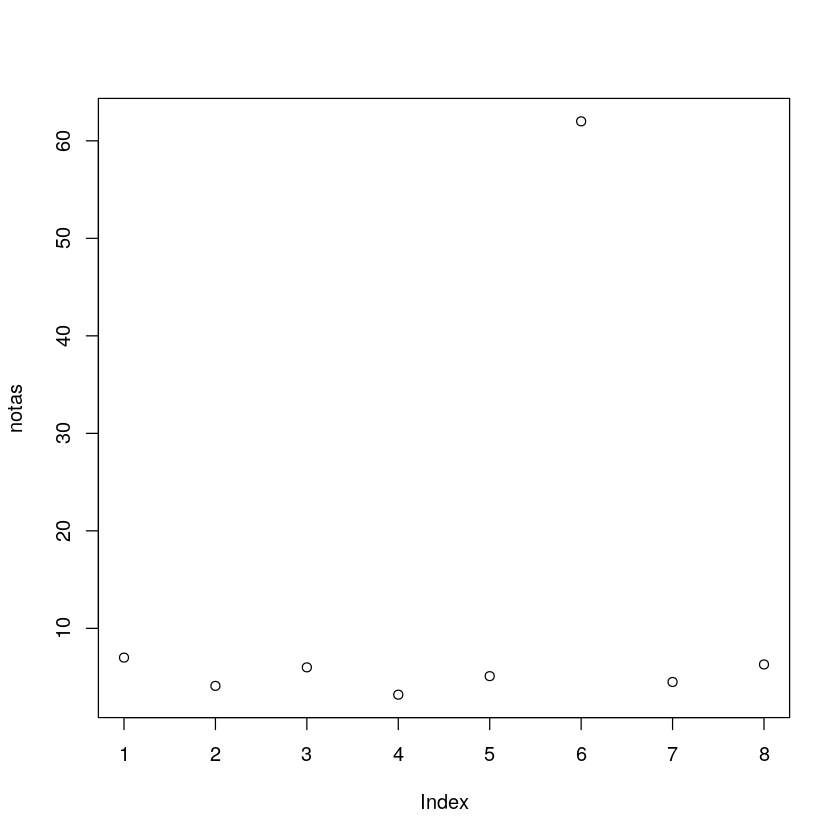

In [9]:
notas = c(7.0 , 4.1 ,6.0 , 3.2, 5.1 ,62, 4.5 , 6.3 )
plot(notas)

Tu sabes que las notas de un alumno varian entre 0 y 7 pero tienes esa nota extraña. Por tanto con una simpre visualización puedes darte cuenta que tienes un dato atípico. En general existen mejores graficos para detectar estos datos atipicos, en R existe un grafico muy clasico que es el qqPlot que es el gráfico de quantile-quantile. Se puede programar de la siguiente forma

In [10]:
#install.packages('car')
library("car")

Loading required package: carData



[1] 6 4

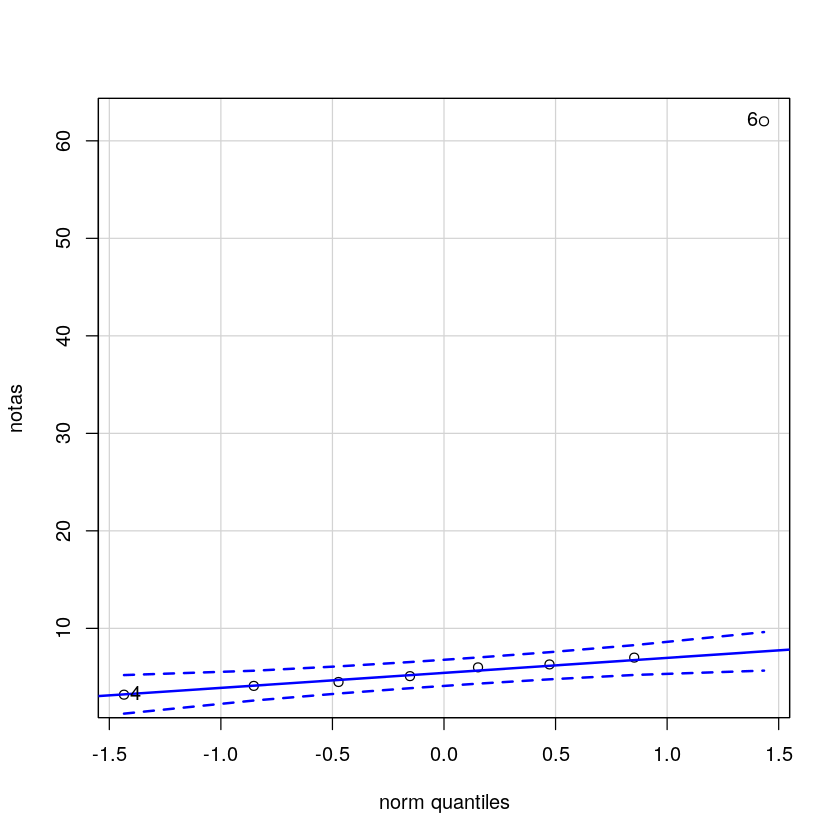

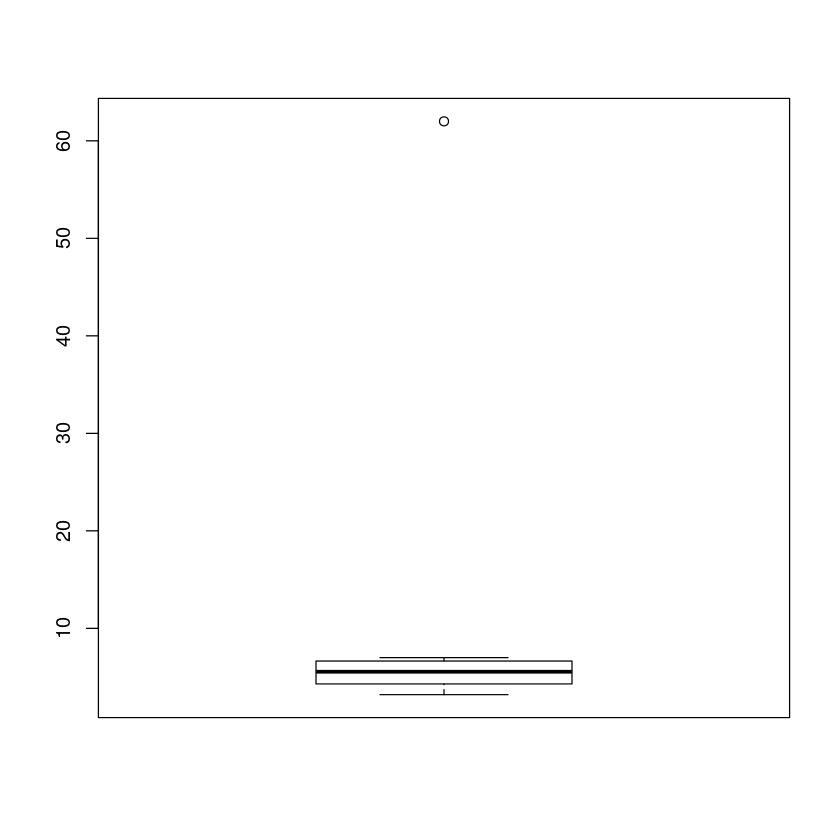

In [11]:
qqPlot(notas)
boxplot(notas)

Los datos fuera de las bandas de confianza los clasificaremos como datos atipicos. Ahora veamos estos gráficos algunos 

[1] 94 41

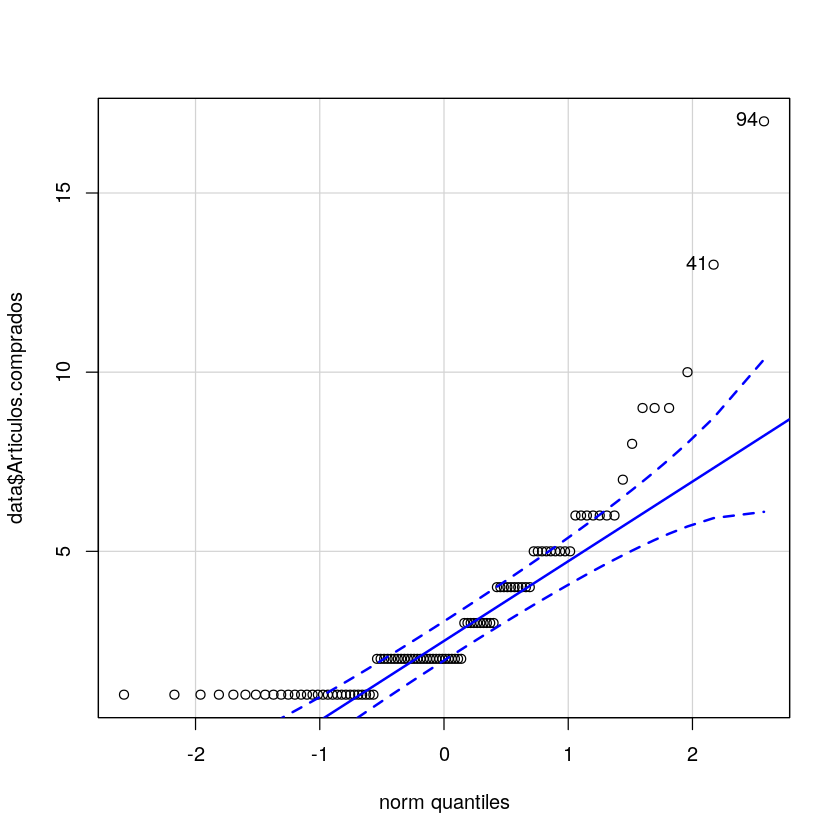

[1] 98 23

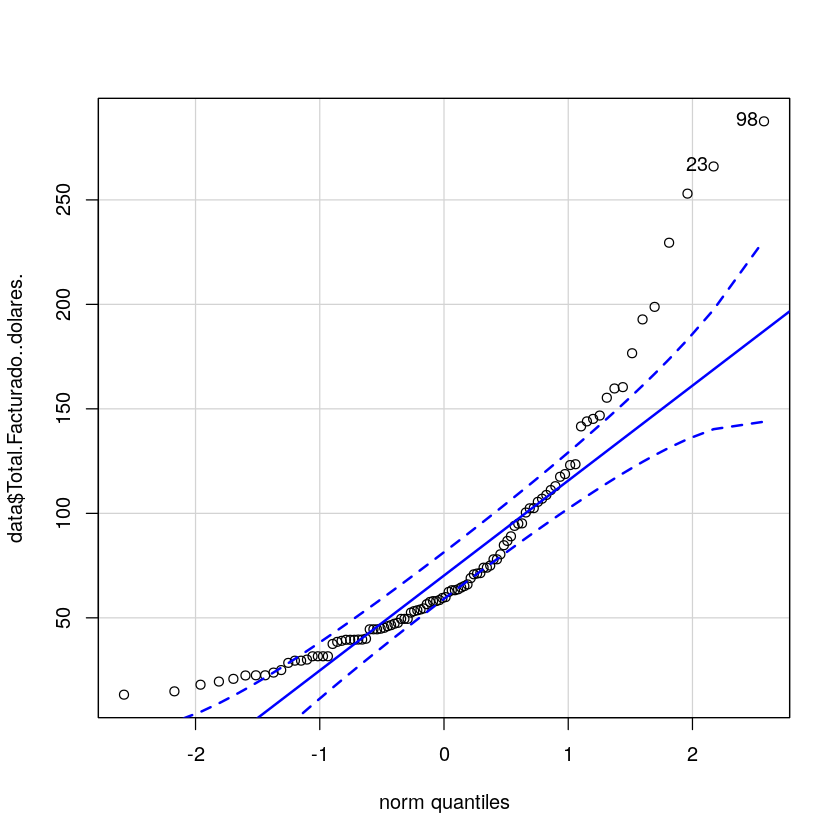

[1] 53 75

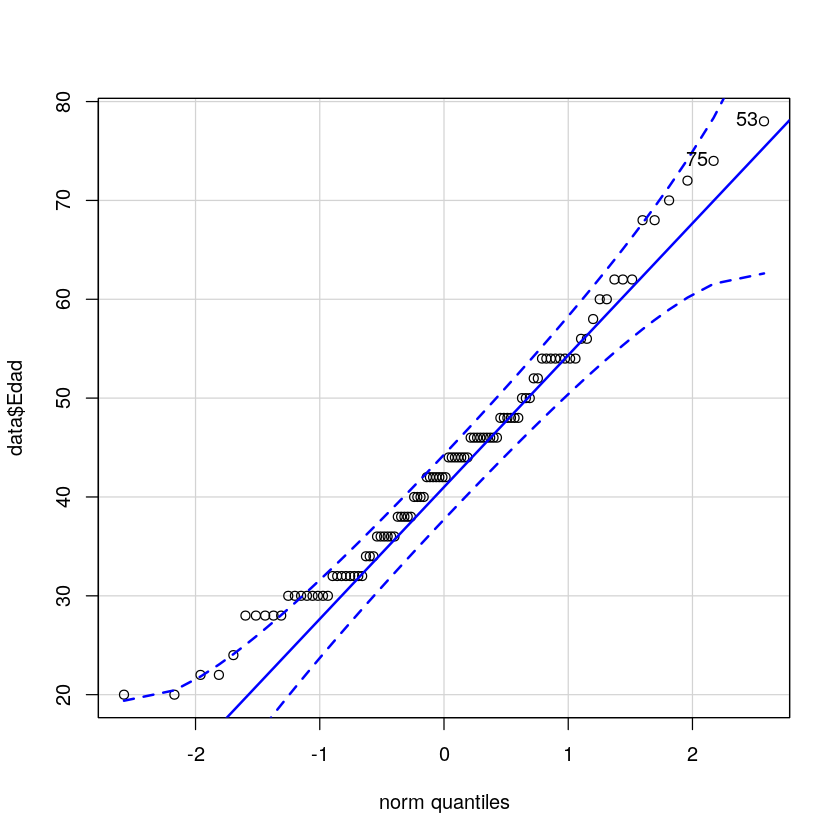

In [12]:
qqPlot(data$Articulos.comprados)
qqPlot(data$Total.Facturado..dolares.)
qqPlot(data$Edad)

En estos plot podemos concluir que existen varios datos atipicos en los articulos comprados y en el Total Facturado pero la no existe una persona con una edad excesivamente rara (200 años por ejemplo)

En general los qqPlot son bastante buenos pero es algo reciente, antiguamente se útilizaban otros gráficos que se llaman boxplots

### Boxplot

Un box plot es un gráfico inter cuartil que permite determinar como se acumulan los datos. Este gráfico es:

<img src="https://miro.medium.com/max/18000/1*2c21SkzJMf3frPXPAR_gZA.png" width="400" alt="utfsm-logo" align="center"/>




La linea amarilla representa la ubicación de la mediana, el sector en rojo el desde el percentil 25 al 75. Y los bigotes representan los extremos tolerables. Finalmente los puntos fuera del boxplot son los llamados datos atipicos o outilers. Revisemos los boxplot de nuestros ejemplos:

,Cliente,Tipo.de.Cliente,Articulos.comprados,Total.Facturado..dolares.,Modo.de.Pago,Sexo,Estado.Civil,Edad,Calidad.de.Servicio,Reclamo
,<int>,<chr>,<int>,<dbl>,<chr>,<chr>,<chr>,<int>,<chr>,<int>
13,13,Promocional,9,160.40,Visa,Hombre,Casado,40,Excelente,3
41,41,Promocional,13,198.80,American Express,Hombre,Casado,42,Bueno,2
50,50,Promocional,9,145.20,MasterCard,Hombre,Casado,46,Excelente,1
94,94,Promocional,17,229.50,American Express,Hombre,Casado,30,Excelente,4
97,97,Promocional,9,253.00,American Express,Hombre,Casado,30,Muy Bueno,3
98,98,Promocional,10,287.59,American Express,Hombre,Casado,52,Excelente,0


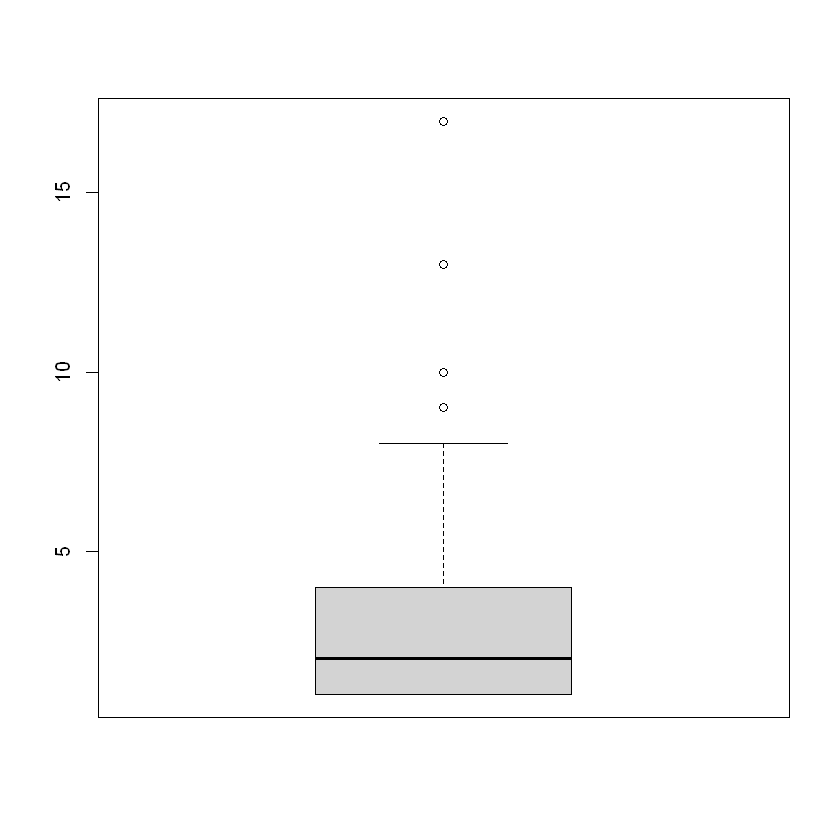

In [39]:
boxplot(data$Articulos.comprados)
IQR = quantile(data$Articulos.comprados,0.75) - quantile(data$Articulos.comprados,0.25)
max = quantile(data$Articulos.comprados,0.75) + 1.5*IQR
subset(data,Articulos.comprados > max)

## Curtosis

En la clase anterior estudiamos la data set `pokemon.csv`, y comentamos un poco el histograma de la variable `Defense`

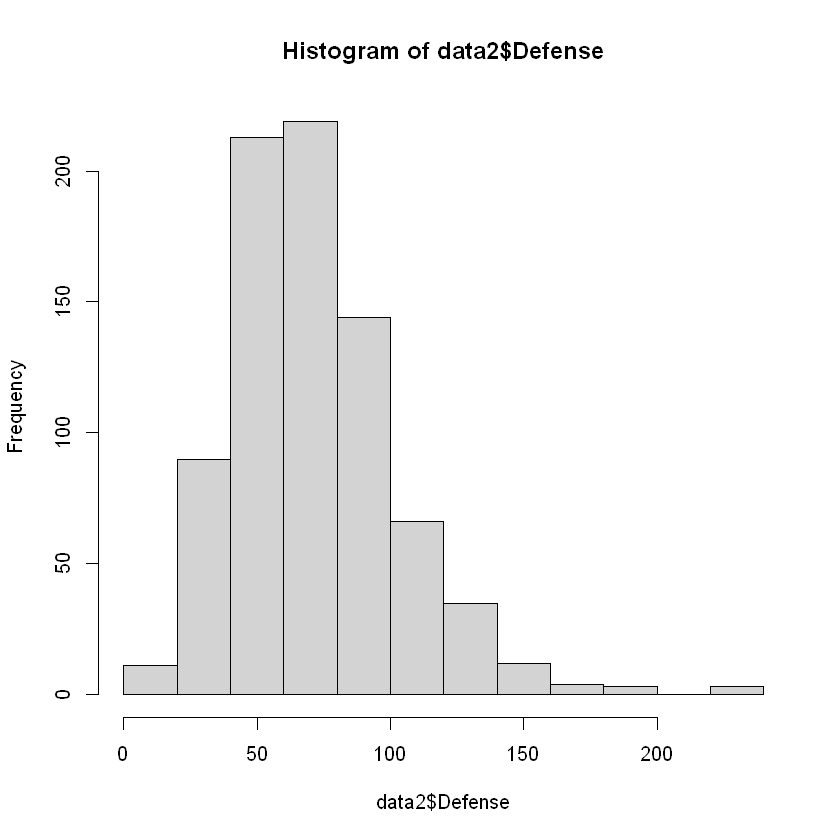

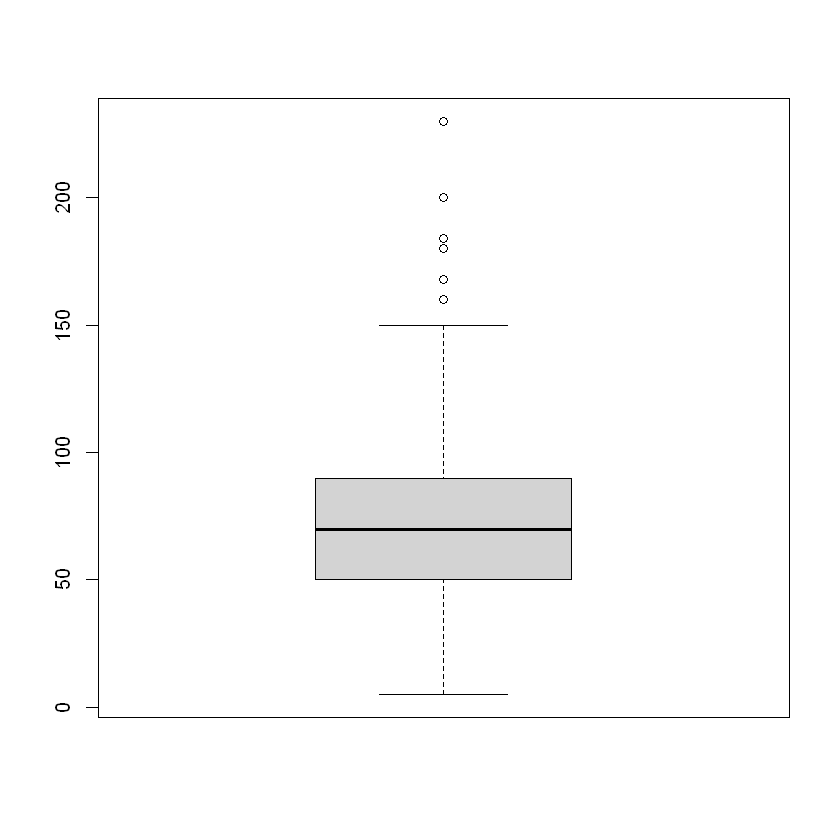

In [40]:
data2 = read.csv('pokemon.csv')
hist(data2$Defense)
boxplot(data2$Defense)

Nos dimos cuenta que existe una expecie de normalidad de los datos, la normalidad se piensa como que los datos vienen de una distribución normal (proximos laboratorios hablaremos en mas detalle). Pero en simples palabras los datos se comportan como una campana de gauss la cual es la que se muestra a continuación.

<img src="https://upload.wikimedia.org/wikipedia/commons/1/1b/Normal_distribution_pdf.png" width="400" alt="utfsm-logo" align="center"/>

Para saber su un conjunto de datos puede ser normal se calcula la kurtosis de los datos el cual viene dado por:

$$
\frac{1}{N} \cdot \frac{\sum_{i=1}^{N}\left(x_{i}-\bar{x}\right)^{4}}{\sigma^{4}}
$$
* Si este coeficiente es 3, la distribución se dice normal (similar a la distribución normal de Gauss) y recibe el nombre de mesocúrtica.
* Si el coeficiente es >3, la distribución se llama leptocúrtica, más puntiaguda que la anterior. Hay una mayor concentración de los datos en torno a la media.
* Si el coeficiente es <3, la distribución se llama platicúrtica y hay una menor concentración de datos en torno a la media. sería más achatada que la primera.

En el R para calcular la curtosis se puede hacer mediante la función `kurtosis()`

Y la simetria de la distribución se puede ver mediante el indice de simetria de Fisher:
$$
\frac{1}{N} \cdot \frac{\sum_{i=1}^{N}\left(x_{i}-\bar{x}\right)^{3} }{\sigma^{3}}
$$
Si la distribución es simétrica, el indice es igual a 0; si es asimétrica a la derecha, es positivo; y si es asimétrica a la izquierda, es negativo. En el R se puede calcular mediante el siguiente par de funciones:

In [15]:
#install.packeges('moments')
library(moments)
skewness(data2$Defense)

[1] 1.153744

Y el curtosis:

In [16]:
kurtosis(data2$Defense)

[1] 5.70176

Por tanto los datos no son tan normales como esperabamos y según el estimador deberia tener esta es asimetrica a la derecha. Veamos un conjunto de datos si es normal:

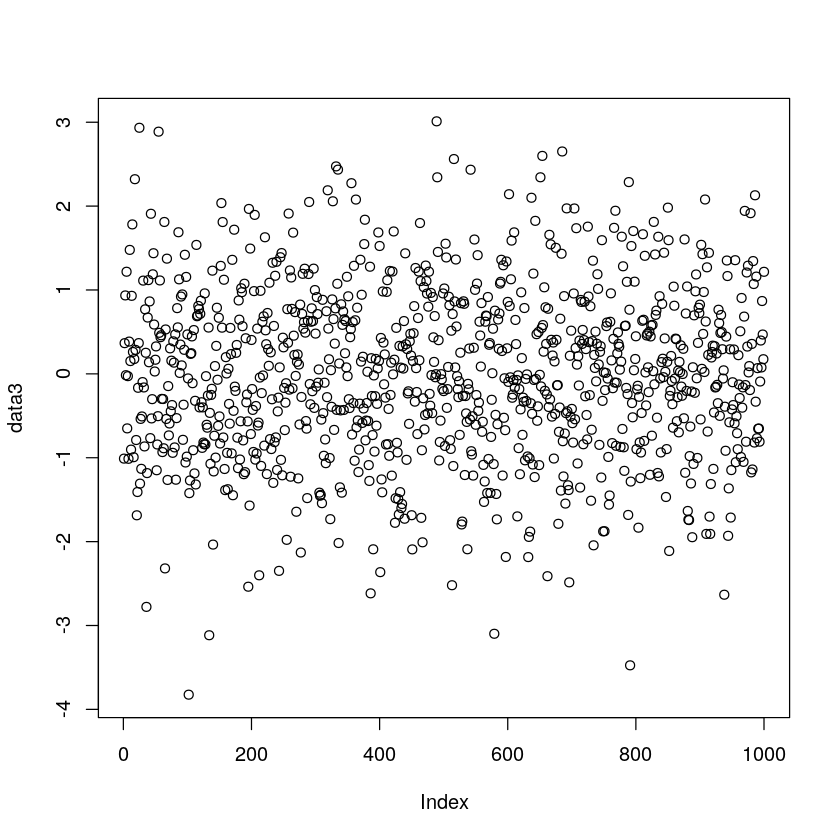

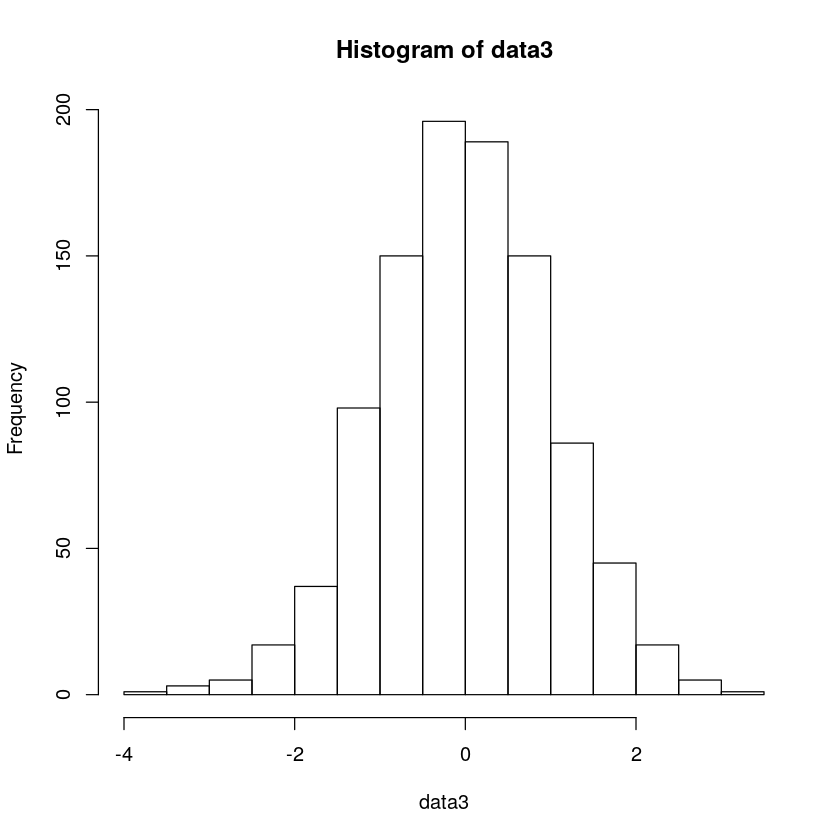

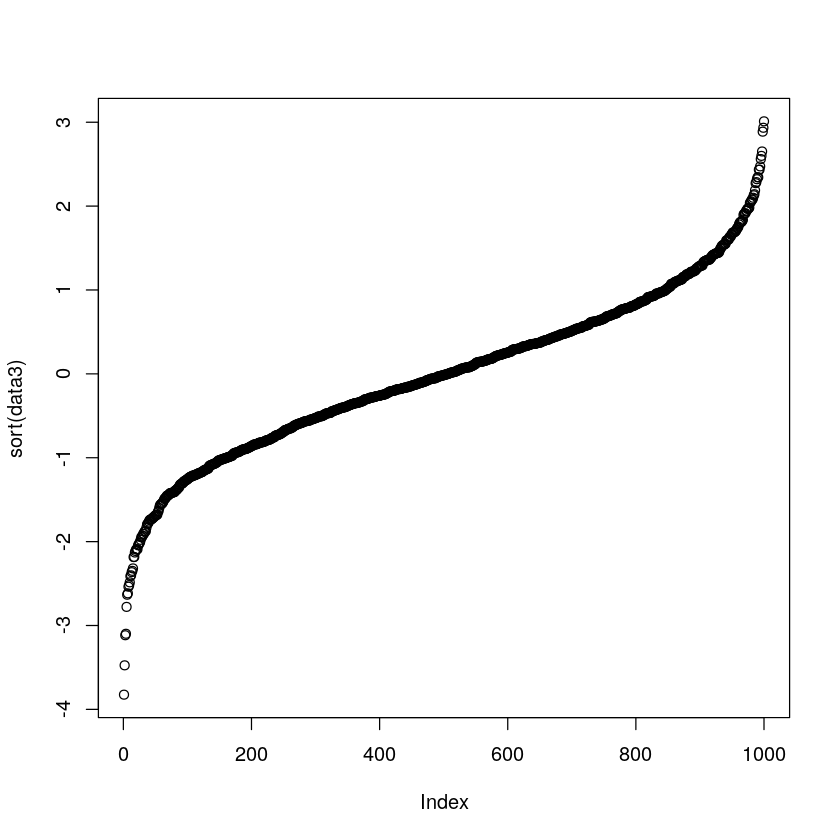

In [17]:
data3=rnorm(1000,0,1)
plot(data3)
hist(data3)
plot(sort(data3))

In [18]:
kurtosis(data3)

[1] 3.163338

In [19]:
skewness(data3)

[1] -0.06420292